In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from subprocess import check_output
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/mushrooms-classification-common-genuss-images/Mushrooms/Amanita/364_jQrviL0WnK8.jpg
/kaggle/input/mushrooms-classification-common-genuss-images/Mushrooms/Amanita/004_wIVV5id0aOg.jpg
/kaggle/input/mushrooms-classification-common-genuss-images/Mushrooms/Amanita/746_Dh_6IpygI6I.jpg
/kaggle/input/mushrooms-classification-common-genuss-images/Mushrooms/Amanita/106_uq4J1lNPq_E.jpg
/kaggle/input/mushrooms-classification-common-genuss-images/Mushrooms/Amanita/586_kLoafsSiyT8.jpg
/kaggle/input/mushrooms-classification-common-genuss-images/Mushrooms/Amanita/603_bOKL0RaK0No.jpg
/kaggle/input/mushrooms-classification-common-genuss-images/Mushrooms/Amanita/575_EEcOtxtcwl4.jpg
/kaggle/input/mushrooms-classification-common-genuss-images/Mushrooms/Amanita/083_GAJUFRatKvg.jpg
/kaggle/input/mushrooms-classification-common-genuss-images/Mushrooms/Amanita/533_-7v3yBfD7_M.jpg
/kaggle/input/mushrooms-classification-common-genuss-images/Mushrooms/Amanita/589_AnaL5Wx-reY.jpg
/kaggle/input/mushro

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.autograd import Variable
import numpy as np 
import zipfile

import matplotlib.pyplot as plt
import time
import os

In [3]:
from fastai.callbacks import ActivationStats
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [4]:
classes = ['Boletus','Entoloma','Russula','Suillus','Lactarius','Amanita','Agaricus','Hygrocybe','Cortinarius']

In [5]:
bs = 128

In [6]:
path = Path('/kaggle/input')
dest = path
dest.mkdir(parents=True, exist_ok=True)

In [7]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train='.', valid_pct=0.35,
                                  ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [8]:
data.classes

['Agaricus',
 'Amanita',
 'Boletus',
 'Cortinarius',
 'Entoloma',
 'Hygrocybe',
 'Lactarius',
 'Russula',
 'Suillus']

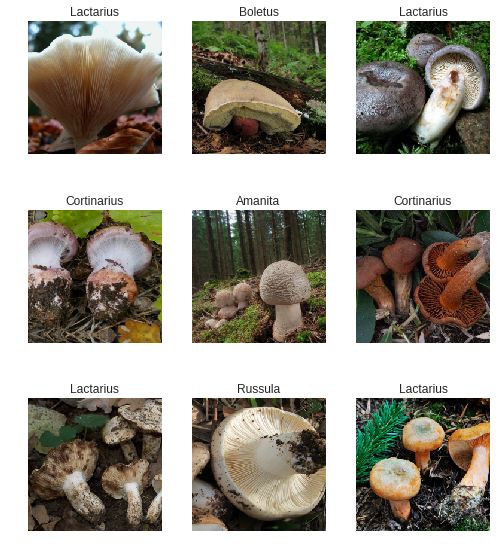

In [9]:
data.show_batch(rows=3, figsize=(7,8))

In [10]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Agaricus',
  'Amanita',
  'Boletus',
  'Cortinarius',
  'Entoloma',
  'Hygrocybe',
  'Lactarius',
  'Russula',
  'Suillus'],
 9,
 8729,
 4699)

In [11]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /tmp/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:07<00:00, 12.9MB/s]


In [12]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [13]:
learn.fit_one_cycle(8, wd=0.9)

epoch,train_loss,valid_loss,accuracy,time
0,1.343471,0.762985,0.753565,06:13
1,0.828465,0.566721,0.811875,06:10
2,0.622782,0.483875,0.843158,06:11
3,0.503532,0.399993,0.875293,06:09
4,0.438890,0.340489,0.898915,06:11
5,0.343132,0.292843,0.916578,06:09
6,0.283665,0.253214,0.927644,06:11
7,0.251511,0.242075,0.930624,06:14


In [14]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


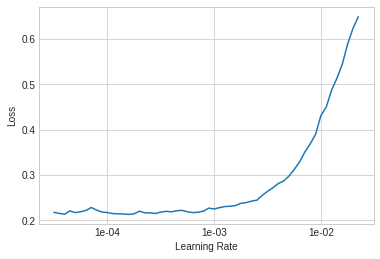

In [15]:
learn.lr_find(start_lr = slice(1e-5),end_lr=slice(1))
learn.recorder.plot()

In [16]:
learn.fit_one_cycle(4, max_lr=slice(1e-5, 2e-3), pct_start=0.8, wd=0.9)

epoch,train_loss,valid_loss,accuracy,time
0,0.224630,0.203784,0.940838,06:20
1,0.245482,0.268774,0.916152,06:20
2,0.234976,0.212147,0.936369,06:24
3,0.127985,0.117074,0.964461,06:26


In [17]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


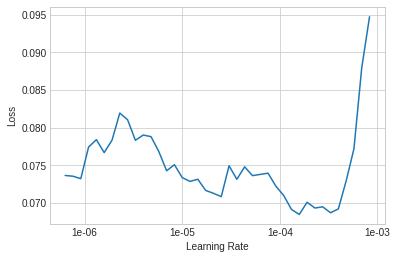

In [18]:
learn.lr_find()
learn.recorder.plot()

In [19]:
learn.fit_one_cycle(4, max_lr=slice(1e-8), pct_start=0.8, wd=0.9)

epoch,train_loss,valid_loss,accuracy,time
0,0.068119,0.116831,0.964248,06:24
1,0.074711,0.115395,0.964673,06:25
2,0.073463,0.118175,0.963184,06:24
3,0.069396,0.116204,0.964035,06:27


In [20]:
interp = ClassificationInterpretation.from_learner(learn)
losses, idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

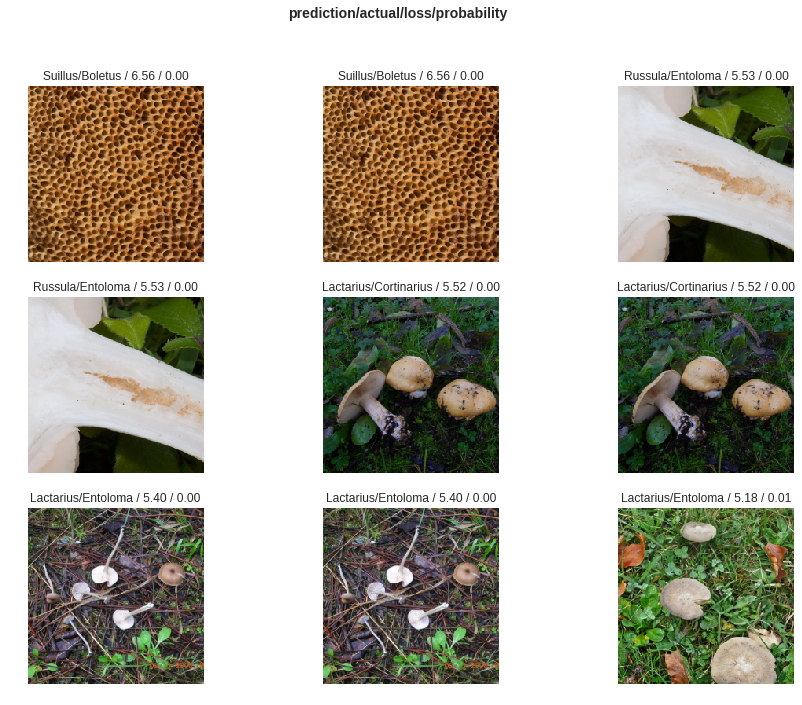

In [21]:
interp.plot_top_losses(9, figsize=(15,11))

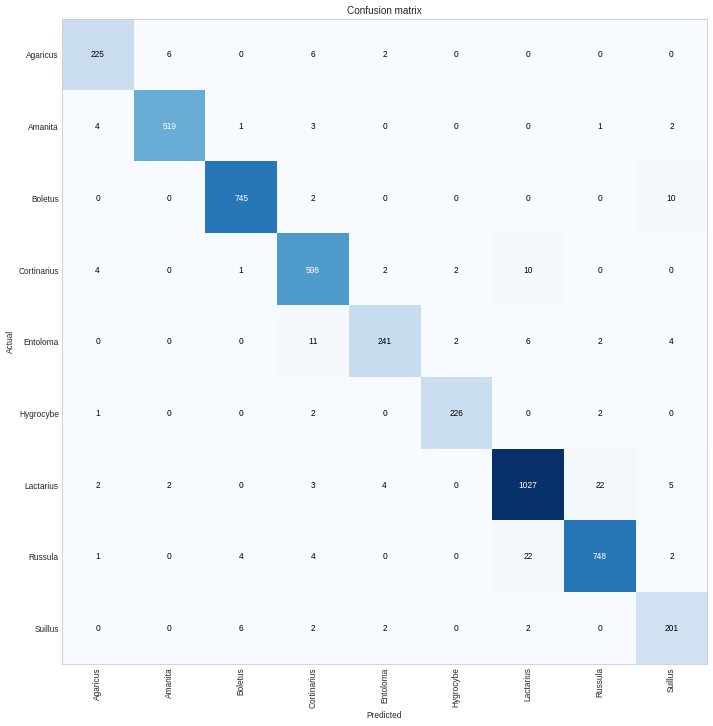

In [22]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [23]:
preds_test,y_test, losses_test= learn.get_preds(ds_type=data.test_ds, with_loss=True)

In [24]:
print("Accuracy on test set: ", accuracy(preds_test,y_test).item())

Accuracy on test set:  0.9953030347824097
